In [103]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
df = pd.read_csv(r"C:\Users\The Dev Reda\Desktop\JadAerospace\AircraftParts\Data\Aircraft_Incident_Dataset.csv")
ds = pd.read_csv(r"C:\Users\The Dev Reda\Desktop\JadAerospace\AircraftParts\Data\\jadaero_parts_cleaned.csv")

ds = ds.copy()

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PartNumber   500 non-null    object
 1   PartName     500 non-null    object
 2   Description  495 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [104]:
IC = df['Incident_Cause(es)'].unique().tolist()
IC

# IMPORTING CATEGORIES AND GIVE IT TO DEEPSEEK TO CREATE A DICTIONARY

['Airplane - Engines, Airplane - Engines - Prop/turbine blade separation, Collision - Object, Collision - Object - Bird, Result - Emergency, forced landing - On runway',
 'Airplane - Undercarriage, Airplane - Undercarriage - Landing gear collapse, Result - Runway mishap',
 'Cargo - Fire/smoke, Result - Damaged on the ground',
 'Result - Damaged on the ground',
 'Landing/takeoff - Tailstrike, Result - Runway mishap',
 'Result - Runway excursion',
 'Info-Unavailable',
 'Result - Runway mishap',
 'Result - Loss of control',
 'Result - Loss of control, Result - Loss of control (presumed)',
 'Landing/takeoff - Landing, Landing/takeoff - Landing - Heavy, Result - Runway mishap',
 'Result - Emergency, forced landing - Ditching',
 'Landing/takeoff - Takeoff - Aborted, Result - Runway excursion',
 'Landing/takeoff - Landing, Landing/takeoff - Landing - Wrong runway/taxiway, Result - Runway excursion',
 'Airplane - Engines, Airplane - Engines - All engine powerloss, Result - Emergency, forced la

In [105]:
# CREATED BY DEEPSEEK

damage_patterns = {
    # ====================== CRITICAL SYSTEMS (Extreme/High Risk) ======================
    "landing_gear": {
        "keywords": [
            "undercarriage", "landing gear", "gear collapse", "gear-up landing", "tire failure", 
            "brake failure", "strut failure", "retraction failure", "oleo failure", "wheel assembly",
            "shimmy", "axle crack", "drag brace", "uplock failure", "downlock sensor"
        ],
        "common_parts": [
            "MLG", "NLG", "STRUT", "ACTUATOR-GEAR", "SHOCK-ABSORB", "BRAKE-ASSY", "WHEEL", 
            "TIRE", "HYDRAULIC-CYL", "TORQUE-LINK", "AXLE", "BEARING", "SHIMMY DAMPER", 
            "UPLOCK", "DOWNLOCK", "TRUCK BEAM", "SCISSOR LINK"
        ],
        "failure_modes": [
            "Structural collapse", "Hydraulic leakage", "Bearing seizure", "Tire blowout", 
            "Brake overheating", "Shimmy vibration", "Corrosion", "Fatigue cracking"
        ],
        "risk_level": "Extreme",
        "replacement_interval": {
            "Tires": "200-300 landings (or tread depth < 2mm)",
            "Brakes": "500-1000 landings (or wear sensors trigger)",
            "Shock Struts": "5-10 years (nitrogen pressure checks every 500hrs)",
            "Actuators": "10,000 cycles/15 years (whichever first)",
            "Bearings": "5,000hrs (or grease contamination)"
        }
    },
    
    "engines": {
        "keywords": [
            "engine failure", "powerloss", "blade separation", "fuel starvation", "uncontained failure", 
            "compressor stall", "turbine damage", "FOD damage", "oil contamination", "fuel pump failure",
            "EGT exceedance", "vibration", "HPT crack", "LPT blade", "seal leak"
        ],
        "common_parts": [
            "HPT", "LPT", "HPC", "LPC", "COMBUSTOR", "NOZZLE", "FUEL PUMP", "OIL PUMP", "IGNITER", 
            "VANE", "BLADE", "SEAL", "BEARING", "ENGINE MOUNT", "NACELLE", "VBV", "HMU", 'ENGINE'
        ],
        "failure_modes": [
            "Metal fatigue", "FOD", "Hot corrosion", "Oil starvation", "Combustion instability", 
            "Vibration-induced cracking", "Buffer air loss", "Bleed valve stuck"
        ],
        "risk_level": "Extreme",
        "replacement_interval": {
            "Fan Blades": "On-condition (ultrasound every 500 cycles)",
            "HPT Blades": "5,000hrs (or TBC spallation)",
            "Bearings": "10,000hrs (or vibration > 4.0 IPS)",
            "Fuel Nozzles": "2,000hrs (flow checks every 500hrs)",
            "Seals": "3-5 years (leak > 5cc/min)"
        }
    },
    
    "flight_controls": {
        "keywords": [
            "aileron jam", "elevator failure", "rudder hardover", "flap asymmetry", "trim runaway", 
            "actuator fault", "control cable snap", "servo valve blockage", "hinge corrosion",
            "FCC fault", "FBW failure", "gust lock", "pushrod fracture", "tab disconnect"
        ],
        "common_parts": [
            "ACTUATOR", "SERVO", "CABLE", "PUSHROD", "BELLCRANK", "FLAP TRACK", "TAB", "HINGE", 
            "TORQUE TUBE", "JACKSCREW", "FCC", "ELAC", "SEC", "FAC", "AP SERVO", "YAW DAMPER"
        ],
        "failure_modes": [
            "Jamming (FOD/seizure)", "Freeplay (wear)", "Hydraulic leak", "Electrical fault", 
            "Corrosion", "Software glitch", "Runaway (trim)", "Feedback failure"
        ],
        "risk_level": "Extreme",
        "replacement_interval": {
            "Hydraulic Actuators": "5,000hrs (leak > 3 drops/hr)",
            "Control Cables": "15 years (or 2% stretch)",
            "Rod Ends": "5 years (play > 0.8mm)",
            "FBW Computers": "On-condition (BIT failures)",
            "Flap Tracks": "20,000 cycles (MPI inspections)"
        }
    },
    
    # ====================== ESSENTIAL SYSTEMS (High/Moderate Risk) ======================
    "fuel_systems": {
        "keywords": [
            "fuel leak", "fuel contamination", "fuel pump", "fuel valve", "fuel filter", 
            "fuel tank", "fuel line", "fuel icing", "water ingress", "vapor lock",
            "crossfeed fault", "quantity error", "fuel heater", "scavenge pump"
        ],
        "common_parts": [
            "PUMP", "VALVE", "FILTER", "TANK", "LINE", "COUPLING", "VENT", "PROBE", "GAUGE", 
            "SEAL", "O-RING", "HEATER", "SCAVENGE", "JETTISON", "FQIS", "DUMP VALVE"
        ],
        "failure_modes": [
            "Seal degradation", "Microbial growth", "Vapor lock", "Electrical arcing", 
            "Pressure fluctuation", "Ice blockage", "Tank corrosion"
        ],
        "risk_level": "High",
        "replacement_interval": {
            "Fuel Pumps": "5,000hrs (flow < 90% spec)",
            "Filters": "500hrs (or ΔP > 15psi)",
            "Probes": "5 years (calibration drift)",
            "Tank Seals": "10 years (or weeping)"
        }
    },
    
    "hydraulic_systems": {
        "keywords": [
            "hydraulic leak", "low pressure", "pump failure", "valve stuck", "actuator drift", 
            "reservoir low", "fluid contamination", "accumulator", "heat exchanger", "filter clog"
        ],
        "common_parts": [
            "PUMP", "VALVE", "ACCUMULATOR", "CYLINDER", "FILTER", "RESERVOIR", "HEAT EXCHANGER", 
            "MANIFOLD", "HOSE", "SEAL", "RELIEF VALVE", "PTU", "RAT"
        ],
        "failure_modes": [
            "Seal failure", "Fluid aeration", "Cavitation", "Contamination", 
            "Thermal degradation", "Hose delamination"
        ],
        "risk_level": "High",
        "replacement_interval": {
            "Pumps": "5,000hrs (efficiency < 80%)",
            "Hoses": "5 years (or outer cracking)",
            "Accumulators": "10 years (precharge checks)",
            "Filters": "1,000hrs (or ΔP > 50psi)"
        }
    },
    
    # ====================== ELECTRICAL/AVIONICS (Moderate Risk) ======================
    "avionics": {
        "keywords": [
            "transponder failure", "altimeter error", "TCAS fault", "GPS loss", "EFIS blank", 
            "FMS reset", "radio static", "instrument failure", "autopilot disconnect",
            "weather radar", "ADF drift", "DME fluctuation", "ILS deviation"
        ],
        "common_parts": [
            "FMC", "ADIRU", "RA", "TCAS", "XPDR", "VHF", "HF", "GPS", "EFIS", "EICAS", 
            "FDR", "CVR", "BUS", "LRU", "RADALT", "ILS", "DME", "MMR"
        ],
        "failure_modes": [
            "Software crash", "EM interference", "Connector oxidation", 
            "Power surge", "Display pixel loss", "Antenna damage"
        ],
        "risk_level": "Moderate",
        "replacement_interval": {
            "Batteries": "2 years (or capacity < 80%)",
            "LRUs": "10 years (or MTBF)",
            "Displays": "15,000hrs (dead pixels > 5%)",
            "Antennas": "On-condition (VSWR > 2:1)"
        }
    },
    
    # ====================== SECONDARY SYSTEMS (Low Risk) ======================
    "interior_components": {
        "keywords": [
            "seat recline fault", "PSU light", "lavatory clog", "galley fire", 
            "bin latch", "window crack", "carpet wear", "curtain rail"
        ],
        "common_parts": [
            "SEAT", "PSU", "LAV", "GALLEY", "BIN", "WINDOW", "CARPET", 
            "PANEL", "DIVIDER", "STEP", "HANDRAIL", "OXYGEN", "PEL"
        ],
        "failure_modes": [
            "Mechanical jam", "Fabric tear", "Latch failure", 
            "Water damage", "Hinge wear"
        ],
        "risk_level": "Low",
        "replacement_interval": {
            "Seat Mechanisms": "On-condition",
            "PSUs": "10 years (LED degradation)",
            "Lav Components": "5 years (sanitary rules)",
            "Window Seals": "7 years (haze > 30%)"
        }
    }
}

# Match part numbers and descriptions to categories
def categorize_part(part_name, description):
    description = str(description).lower()
    for category, data in damage_patterns.items():
        # Check if part number matches known patterns
        if any(common_parts in part_name for common_parts in data['common_parts']):
            return category
        # Check description keywords
        if any(keyword in description for keyword in data['keywords']):
            return category
    return 'other'

def get_risk_level(part_name, description):
    """
    Get risk level for aircraft parts based on categorization
    """
    category = categorize_part(part_name, description)
    
    if category in damage_patterns:
        return damage_patterns[category]['risk_level']
    else:
        return 'Unknown'
    
def get_primary_replacement_interval(part_name, description):
    """
    Get the most relevant replacement interval for a specific part
    This function attempts to match the part name to specific components
    """
    category = categorize_part(part_name, description)
    part_name_upper = str(part_name).upper()
    
    if category in damage_patterns:
        replacement_dict = damage_patterns[category].get('replacement_interval', {})
        
        # Try to find the most specific match first
        for component, interval in replacement_dict.items():
            if any(word in part_name_upper for word in component.upper().split()):
                return interval
        
        # If no specific match, return the first available interval
        if replacement_dict:
            return list(replacement_dict.values())[0]
    
    return 'On-condition'

# Apply to your DataFrame
ds['damage_category'] = ds.apply(lambda x: categorize_part(x['PartName'], x['Description']), axis=1)
# Add risk level
ds['risk_level'] = ds.apply(lambda x: get_risk_level(x['PartName'], x['Description']), axis=1)
# Add replacement interval (primary/most relevant)
ds['replacement_interval'] = ds.apply(lambda x: get_primary_replacement_interval(x['PartName'], x['Description']), axis=1)

ds[ds['damage_category'] != 'other'].sample(10)

,PartNumber,PartName,Description,damage_category,risk_level,replacement_interval
154,55D680,VANE ASSEMBLY,Part Number: 55D680\r\rDescription: FAN EXIT-G...,engines,Extreme,On-condition (ultrasound every 500 cycles)
389,GC542-0048-23,BLANK PANEL ASSY,Part Number: GC542-0048-23\r\rDescription: PAN...,interior_components,Low,On-condition
352,2780539-107,ISOLATION VALVE,Part Number: 2780539-107\r\rDescription: 6-INC...,fuel_systems,High,"5,000hrs (flow < 90% spec)"
57,810205-3,"VALVE, CHECK","Part Number: 810205-3\r\rDescription: VALVE, C...",fuel_systems,High,"5,000hrs (flow < 90% spec)"
189,029-658-0,NOSE TIRE,Part Number: 029-658-0\r\rDescription: TIRE 26...,landing_gear,Extreme,200-300 landings (or tread depth < 2mm)
473,90002317-2WTA,WHEEL MAIN,Part Number: 90002317-2WTA\r\rDescription: EJE...,landing_gear,Extreme,200-300 landings (or tread depth < 2mm)
18,3876131-1,IGNITER PLUG,Part Number: 3876131-1\r\rDescription: IGNITER...,engines,Extreme,On-condition (ultrasound every 500 cycles)
460,3883297-7,FLOW DIVIDER ASSY,Part Number: 3883297-7\r\rDescription: FLOW DI...,interior_components,Low,On-condition
163,141W6105-22,HINGE ASSY,Part Number: 141W6105-22\r\rDescription: HINGE...,flight_controls,Extreme,"5,000hrs (leak > 3 drops/hr)"
101,144-186-000-011,VIBRATION SENSOR,Part Number: 144-186-000-011\r\rDescription: S...,engines,Extreme,On-condition (ultrasound every 500 cycles)


In [106]:
ds = ds.rename(columns={'damage_category': 'DamageCategory'})
ds[ds['DamageCategory'] != 'other'].sample(10)

#RENAME COLUMN DamageCategory

,PartNumber,PartName,Description,DamageCategory,risk_level,replacement_interval
57,810205-3,"VALVE, CHECK","Part Number: 810205-3\r\rDescription: VALVE, C...",fuel_systems,High,"5,000hrs (flow < 90% spec)"
5,887477,HYDRAULIC PUMP,Part Number: 887477\r\rDescription: AC MOTOR P...,fuel_systems,High,"5,000hrs (flow < 90% spec)"
35,3009243,"BEARING, BALL, FLANGED","Part Number: 3009243\r\rDescription: BEARING, ...",landing_gear,Extreme,200-300 landings (or tread depth < 2mm)
147,20P78-6,VALVE,"Part Number: 20P78-6\r\rDescription: VALVE, TU...",fuel_systems,High,"5,000hrs (flow < 90% spec)"
473,90002317-2WTA,WHEEL MAIN,Part Number: 90002317-2WTA\r\rDescription: EJE...,landing_gear,Extreme,200-300 landings (or tread depth < 2mm)
182,822-0334-003,TRANSCEIVER,Part Number: 822-0334-003\r\rDescription: TRAN...,avionics,Moderate,2 years (or capacity < 80%)
18,3876131-1,IGNITER PLUG,Part Number: 3876131-1\r\rDescription: IGNITER...,engines,Extreme,On-condition (ultrasound every 500 cycles)
28,4275-1-011-8110,RESTRAINT SYSTEM,Part Number: 4275-1-011-8110\r\rDescription: R...,avionics,Moderate,2 years (or capacity < 80%)
214,L3022036-025,BRACKET,Part Number: L3022036-025\r\rDescription: BRACKET,avionics,Moderate,2 years (or capacity < 80%)
184,G4000VSVA01,ACTUATOR STATOR,Part Number: G4000VSVA01\r\rDescription: ACTUA...,flight_controls,Extreme,"5,000hrs (leak > 3 drops/hr)"


In [107]:
ds[ds['PartName'] == 'ENGINE NEW 675 HP']


,PartNumber,PartName,Description,DamageCategory,risk_level,replacement_interval
499,PT6A-114A,ENGINE NEW 675 HP,NaN,engines,Extreme,On-condition (ultrasound every 500 cycles)


In [108]:
ds[ds['DamageCategory'] == 'engines']


,PartNumber,PartName,Description,DamageCategory,risk_level,replacement_interval
13,338-067-014-0,FAN OUTLET GUIDE VANE,Part Number: 338-067-014-0\r\rDescription: VAN...,engines,Extreme,On-condition (ultrasound every 500 cycles)
18,3876131-1,IGNITER PLUG,Part Number: 3876131-1\r\rDescription: IGNITER...,engines,Extreme,On-condition (ultrasound every 500 cycles)
26,7439FT972,SEAL-T RING,Part Number: 7439FT972\r\rDescription: SEAL AS...,engines,Extreme,On-condition (ultrasound every 500 cycles)
38,PR1440B1/2,"SEALANT, 654 SEM-KIT – 6OZ",Part Number: PR1440B1/2\r\rDescription: SEALAN...,engines,Extreme,On-condition (ultrasound every 500 cycles)
40,13100-200,SEAL,Part Number: 13100-200\r\rDescription: SEAL DU...,engines,Extreme,On-condition (ultrasound every 500 cycles)
41,PR1826B1/4,SEALANT SEMKIT,Part Number: PR1826B1/4\r\rDescription: SEALAN...,engines,Extreme,On-condition (ultrasound every 500 cycles)
44,517212-4,IGNITER,Part Number: 517212-4\r\rDescription: IGNITER,engines,Extreme,On-condition (ultrasound every 500 cycles)
49,697071003,PROPELLER BLADE,Part Number: 697071003\r\rDescription: PROPELL...,engines,Extreme,On-condition (ultrasound every 500 cycles)
53,PR1425B-1/2-CF,SEALANT,Part Number: PR1425B-1/2-CF\r\rDescription: SE...,engines,Extreme,On-condition (ultrasound every 500 cycles)
54,4501089A,NOZZLE ASSY,Part Number: 4501089A\r\rDescription: NOZZLE A...,engines,Extreme,On-condition (ultrasound every 500 cycles)


In [109]:
ds['DamageCategory'].value_counts()

# SHOW THE UNIQUE VALUES IN THE DamageCategory COLUMN
#  27 ROWS FROM 500 ROWS
# AFTER CLEANING AND SERCHING FOR OTHER PARTS 
#  193 ROWS FROM 500 ROWS

DamageCategory
other                  287
fuel_systems            60
avionics                54
engines                 29
flight_controls         23
landing_gear            18
hydraulic_systems       15
interior_components     14
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Damage Categories')

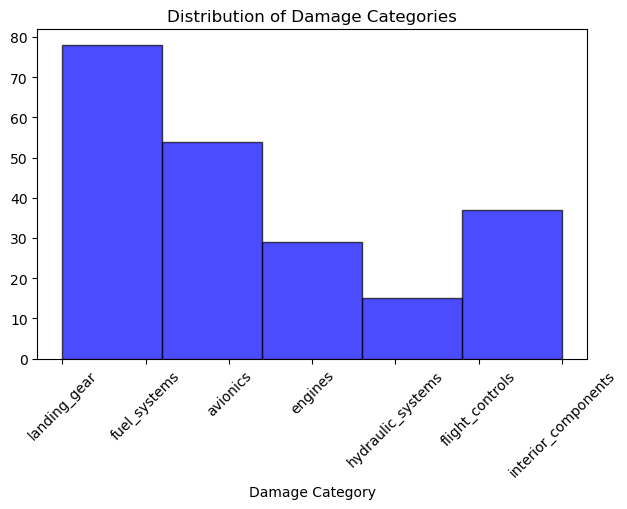

In [110]:
plt.hist(ds[ds['DamageCategory'] != 'other']['DamageCategory'], bins=5, color='blue', edgecolor='black', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Damage Category')
plt.title('Distribution of Damage Categories')

In [ ]:
dv = ds[ds['DamageCategory'] == 'other']
dv['PartName'].unique().tolist()


# I CANT FIND THE SOLUTION FOR THESE OTHER PARTS

['COMMAND SENSOR',
 'ANTI-COLLISION LIGHT',
 'OVERPRESSURE PROTECTOR',
 'PRIMARY ACCESS TERMINAL',
 'EXCITER-IGNITION',
 'PIPE ASSY',
 'PASSENGER SERVICE UNIT',
 'BOX, RELAY',
 'SWITCH, PRESSURE',
 'WINDSHIELD ASSY (RH)',
 'DUCT ASSY PYLON',
 'BEAM ASSY',
 'LIGHT STRIP',
 'JET OIL II  MIL-PRF-23699',
 'BLOCK ASSEMBLY',
 'BOLT',
 'SENSOR',
 'SELF LEVELLING GREEN',
 'HEAD ASSY',
 'CARTRIDGE',
 'RING',
 'PAPER ROLL',
 'VDR ASSEMBLY',
 'SENSOR – OIL LEVEL',
 'DUCT-AIR',
 'RECEPTACLE',
 'STUD, NUT',
 'GROMMET',
 'SENSING ELEMENT',
 'DE-ICER',
 'BRUSH ELECTRICAL',
 'BATTERY PACK',
 'MASK ASSY',
 'PASSENGER CONTROL UNIT',
 'RETAINER',
 'FUEL COMPUTER, DEEC',
 'LATCH ASSY',
 'SMOKE HOOD',
 'SUPPORT ASSY, NET',
 'PAINT',
 'FLOODLIGHT',
 'CONTROLLER, APU',
 'DETENT ASSY',
 'ELECTRONIC CHRONOMETER',
 'COOLING UNIT,GROUND',
 'CONTROL DISPLAY UNIT',
 'FIRE BLANKET UPPER C',
 'FLIGHT MANAGEMENT COMPUTER',
 'UNIT ASSY – AIR DATA INERTIAL',
 'FLIGHT CONTROL COMPUTER',
 'FTU-RUDDER PEDAL',
 'SPEED SENS

In [112]:
ds.to_csv(r"C:\Users\The Dev Reda\Desktop\JadAerospace\AircraftParts\Data\jadaero_parts_categorized(Damage).csv", index=False)
# Save the categorized DataFrame to a new CSV file